In [4]:
import pandas as pd

#base = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')
base = pd.read_csv('MICRODADOS_ENEM_2019_SAMPLE_43278.csv')
base.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [5]:
base.shape

(127380, 136)

In [6]:
base['SG_UF_RESIDENCIA']

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [11]:
base['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [12]:
base['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [15]:
base['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

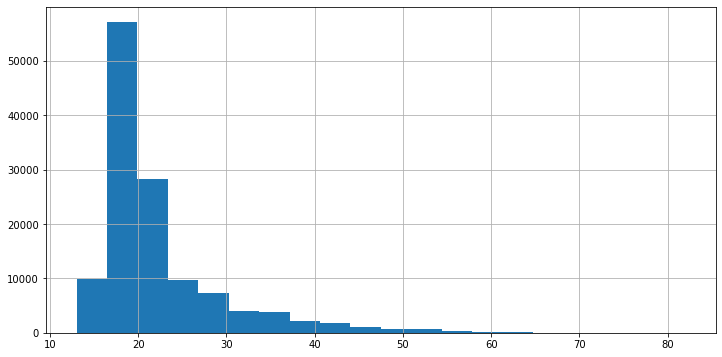

In [45]:
base['NU_IDADE'].hist(bins = 20, figsize=(12,6));

In [59]:
base.query('IN_TREINEIRO==1')['NU_IDADE'].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

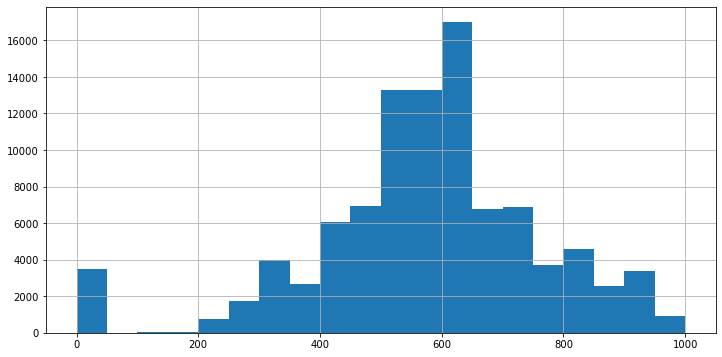

In [87]:
base['NU_NOTA_REDACAO'].hist(bins=20, figsize=(12,6));

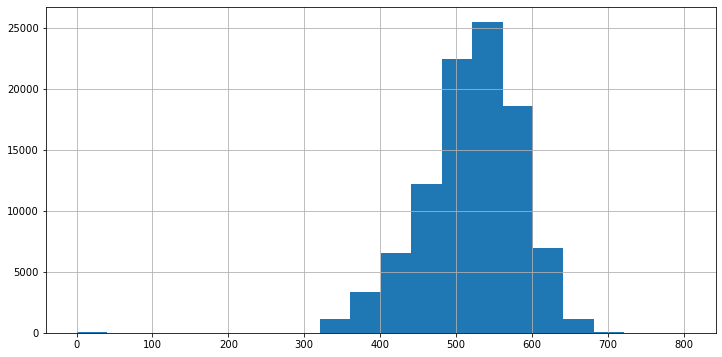

In [88]:
base['NU_NOTA_LC'].hist(bins=20, figsize=(12,6));

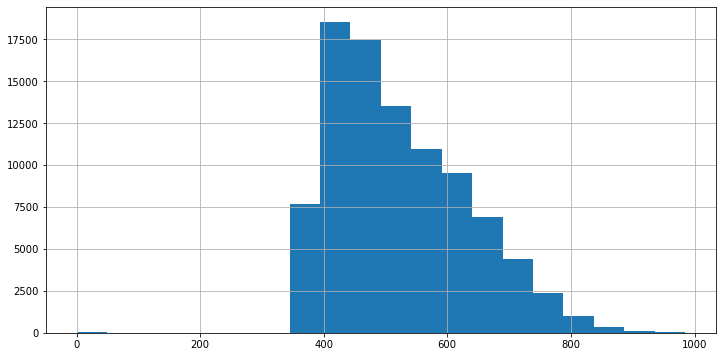

In [89]:
base['NU_NOTA_MT'].hist(bins=20, figsize=(12,6));

In [90]:
base['NU_NOTA_REDACAO'].mean()

571.5700253970197

In [91]:
base['NU_NOTA_MT'].std()

109.4169387673804

In [92]:
provas = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
base[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [93]:
base['NU_NOTA_LC'].quantile(0.9) # 10% mais alto

596.3

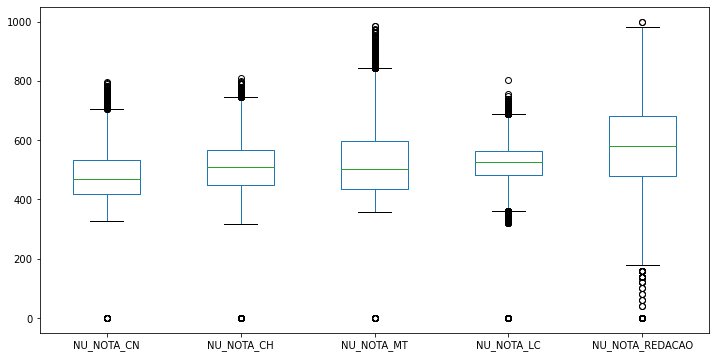

In [95]:
base[provas].plot.box(figsize=(12,6));

### Desafio 1: Proporção de inscritos por idade

In [33]:
total_inscritos = base.shape[0]
dados = ((base['NU_IDADE'].value_counts()/total_inscritos)*100).to_frame('PROPORCAO_IDADE').sort_index()
dados

,PROPORCAO_IDADE
13,0.003140
14,0.110692
15,1.577171
16,6.146962
17,16.687078
...,...
73,0.001570
75,0.001570
76,0.000785
77,0.000785


### Desafio 2: Descrobir de quais estados são os inscritos com 13 anos

In [35]:
base[base['NU_IDADE'] == 13]['SG_UF_RESIDENCIA'].value_counts()

MT    1
BA    1
SP    1
AP    1
Name: SG_UF_RESIDENCIA, dtype: int64

### Desafio 3: Adicionar título no gráfico 

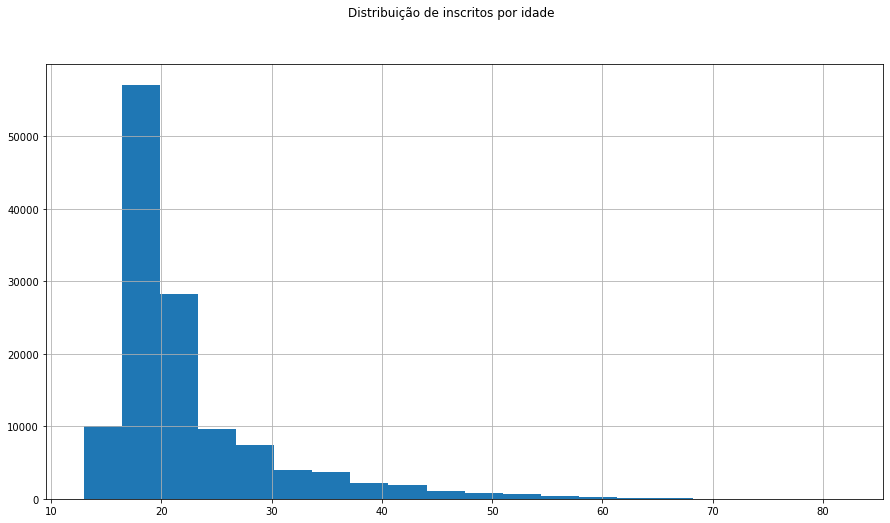

In [49]:
import pylab as pl
base['NU_IDADE'].hist(bins = 20, figsize=(15,8));
plt.plot(title = 'Distribuição de inscritos por idade');
pl.suptitle("Distribuição de inscritos por idade");

### Desafio 04: Histograma de treineiros e não treineiros

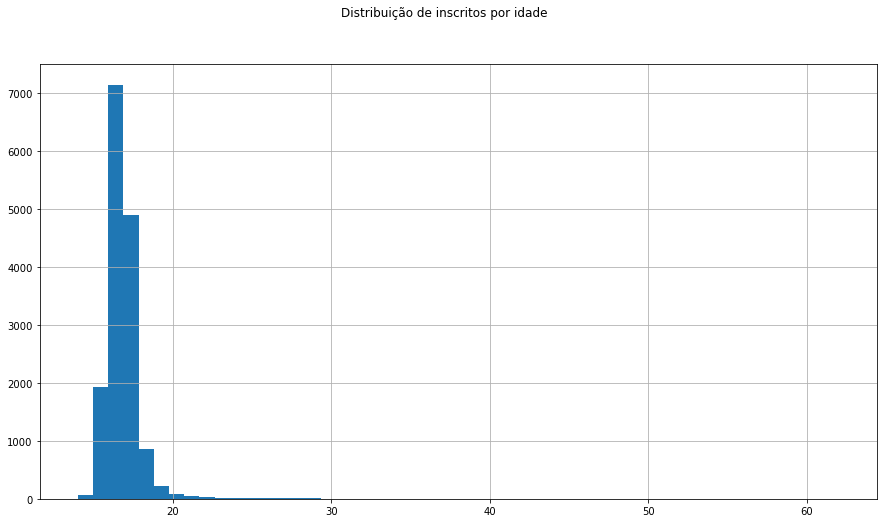

In [77]:
import pylab as pl
dados = base.query('IN_TREINEIRO==1')['NU_IDADE'].sort_index().to_frame()
dados['NU_IDADE'].hist(bins = 50, figsize=(15,8));
plt.plot(title = 'Distribuição de inscritos treineiros por idade');
pl.suptitle("Distribuição de inscritos por idade");

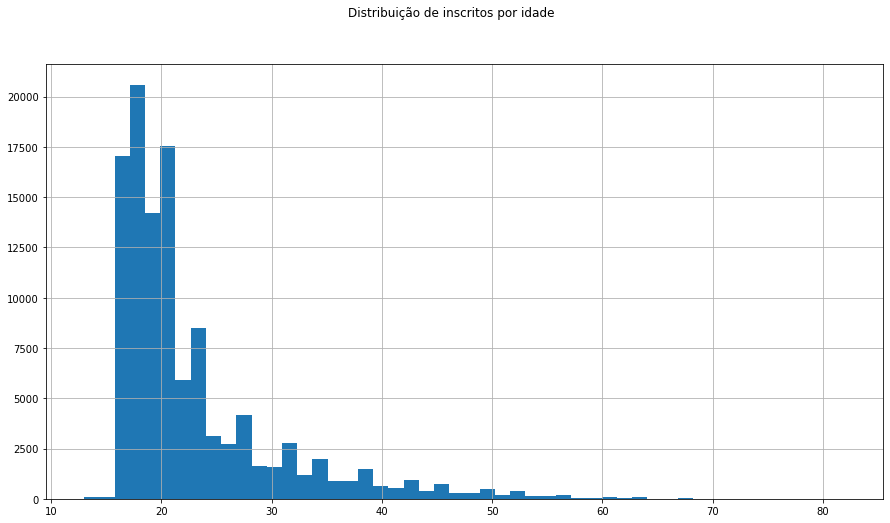

In [78]:
dados = base.query('IN_TREINEIRO!=1')['NU_IDADE'].sort_index().to_frame()
dados['NU_IDADE'].hist(bins = 50, figsize=(15,8));
plt.plot(title = 'Distribuição de inscritos não treineiros por idade');
pl.suptitle("Distribuição de inscritos por idade");

In [79]:
base.query('IN_TREINEIRO!=1')['NU_IDADE'].sort_index().to_frame()

,NU_IDADE
1,23
2,35
3,23
5,18
6,21
...,...
127375,17
127376,18
127377,22
127378,26
